<a href="https://colab.research.google.com/github/el-moudni-hicham/evergreen-classification-problem/blob/main/evergreen_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

<ipython-input-1-08dd3a4481d3>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
_ = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c stumbleupon

 93% 157M/168M [00:01<00:00, 124MB/s]
100% 168M/168M [00:02<00:00, 87.5MB/s]


In [6]:
!ls

kaggle.json  sample_data  stumbleupon.zip


In [7]:
!unzip stumbleupon.zip

Archive:  stumbleupon.zip
  inflating: raw_content.zip         
  inflating: sampleSubmission.csv    
  inflating: test.tsv                
  inflating: train.tsv               


## Data Analysis

In [8]:
import pandas as pd
import numpy as np

In [9]:
raw_df = pd.read_csv('train.tsv', sep='\t')
df = raw_df.copy()
del df['framebased']
del df['urlid']
del df['alchemy_category_score']
df['is_news'] = df['is_news'].str.replace('?','0').astype(int)

<ipython-input-9-aecf480c8821>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['is_news'] = df['is_news'].str.replace('?','0').astype(int)


In [10]:
df['is_news'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
7390    1
7391    1
7392    0
7393    1
7394    0
Name: is_news, Length: 7395, dtype: int64>

In [11]:
df.sample(2)

,url,boilerplate,alchemy_category,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
4481,http://9humor.com/black-parenting/,"{""url"":""9humor black parenting"",""title"":""Black...",science_technology,1.700000,0.300000,0.000000,0.000000,0.000000,21.000000,-1.000000,...,0,0,52,?,86,10,2,0.100000,0.0000,0
1206,http://www.wikihow.com/Sleep-Better,"{""url"":""wikihow Sleep Better"",""title"":""How to ...",health,2.625592,0.438247,0.163347,0.067729,0.015936,0.580081,0.009009,...,1,1,19,0,11255,251,2,0.167331,0.0625,1


In [12]:
df.sample().T

,2927
url,http://coupon.arbys.com/MarchArbysStPatricksDa...
boilerplate,"{""url"":""coupon arbys March Arbys St Patricks D..."
alchemy_category,computer_internet
avglinksize,2.428571
commonlinkratio_1,0.666667
commonlinkratio_2,0.166667
commonlinkratio_3,0.0
commonlinkratio_4,0.0
compression_ratio,0.647059
embed_ratio,0.0


In [13]:
df.iloc[1]

url                               http://www.popsci.com/technology/article/2012-...
boilerplate                       {"title":"The Fully Electronic Futuristic Star...
alchemy_category                                                         recreation
avglinksize                                                                3.677966
commonlinkratio_1                                                          0.508021
commonlinkratio_2                                                           0.28877
commonlinkratio_3                                                          0.213904
commonlinkratio_4                                                          0.144385
compression_ratio                                                          0.468649
embed_ratio                                                                     0.0
frameTagRatio                                                              0.098707
hasDomainLink                                                               

In [14]:
df.alchemy_category.value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [15]:
df.label.mean()

0.5133198106828939

In [16]:
df.groupby('alchemy_category').label.mean().sort_values()

alchemy_category
weather               0.000000
sports                0.205263
computer_internet     0.246622
unknown               0.333333
gaming                0.368421
arts_entertainment    0.371945
religion              0.416667
law_crime             0.419355
science_technology    0.456747
culture_politics      0.457726
?                     0.502135
health                0.573123
recreation            0.684296
business              0.711364
Name: label, dtype: float64

In [17]:
df.groupby('alchemy_category').label.count().sort_values()

alchemy_category
weather                  4
unknown                  6
law_crime               31
religion                72
gaming                  76
science_technology     289
computer_internet      296
culture_politics       343
sports                 380
health                 506
business               880
arts_entertainment     941
recreation            1229
?                     2342
Name: label, dtype: int64

<Axes: ylabel='alchemy_category'>

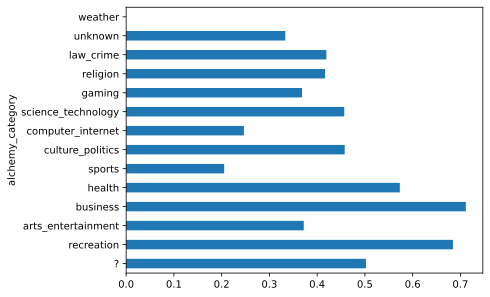

In [18]:
df.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)['mean'].plot.barh()

<ipython-input-19-b919b6145f7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs())


<Axes: >

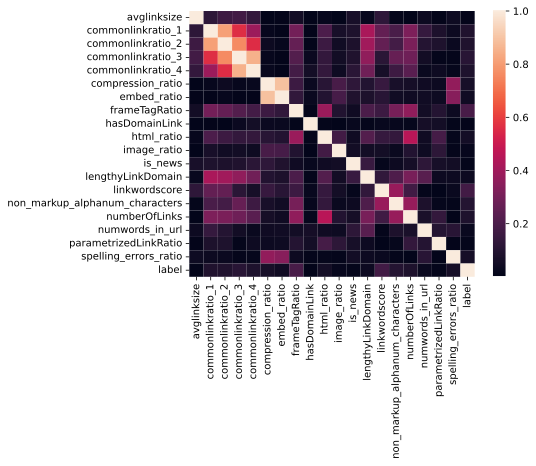

In [19]:
import seaborn as sns
sns.heatmap(df.corr().abs())

In [20]:
df.corr().abs()[['label']].sort_values(['label'])

<ipython-input-20-9e53ffc4050c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs()[['label']].sort_values(['label'])


,label
hasDomainLink,0.004863
avglinksize,0.006172
is_news,0.009103
parametrizedLinkRatio,0.010668
image_ratio,0.017266
numwords_in_url,0.024823
lengthyLinkDomain,0.032824
embed_ratio,0.039536
html_ratio,0.051149
spelling_errors_ratio,0.058578


<ipython-input-21-905a7c794a0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs()[['label']].sort_values(['label']))


<Axes: >

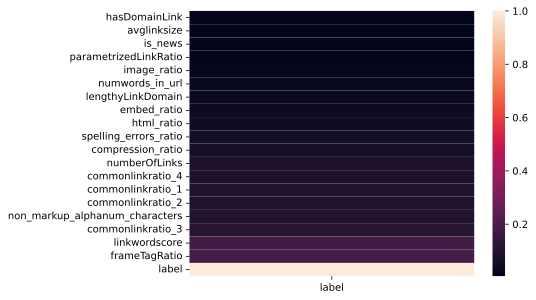

In [21]:
sns.heatmap(df.corr().abs()[['label']].sort_values(['label']))

<Axes: xlabel='label', ylabel='linkwordscore'>

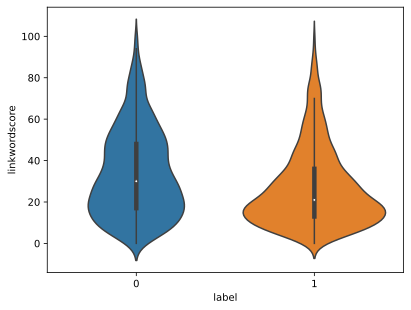

In [22]:
sns.violinplot(x='label', y='linkwordscore', data=df)

In [23]:
df_features = df.drop('label', axis=1)
num_features = df_features.select_dtypes(np.number)
num_features

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0.090774,0,0.245831,0.003883,1,1,24,5424,170,8,0.152941,0.079130
1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0.098707,0,0.203490,0.088652,1,1,40,4973,187,9,0.181818,0.125448
2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0.072448,0,0.226402,0.120536,1,1,55,2240,258,11,0.166667,0.057613
3,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0.095861,0,0.265656,0.035343,1,0,24,2737,120,5,0.041667,0.100858
4,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0.024908,0,0.228887,0.050473,1,1,14,12032,162,10,0.098765,0.082569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,3.010526,0.474747,0.222222,0.191919,0.191919,0.474273,0.0,0.177043,0,0.256669,0.048780,1,1,38,2219,99,11,0.040404,0.071429
7391,2.208054,0.483333,0.246667,0.036667,0.026667,0.558184,0.0,0.057377,0,0.218014,0.225962,1,1,34,5672,300,4,0.020000,0.109453
7392,2.000000,0.315789,0.171053,0.105263,0.052632,0.692529,0.0,0.124122,0,0.248388,0.464286,0,1,43,848,76,5,0.434211,0.117647
7393,1.026316,0.210526,0.052632,0.000000,0.000000,21.000000,-1.0,0.097778,0,0.256070,-1.000000,1,0,37,386,38,0,0.026316,0.333333


In [24]:
num_features.columns

Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'],
      dtype='object')

In [25]:
num_features.describe()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,0.021231,0.233778,0.275709,0.615551,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221
std,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,1.919320,0.486498,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,0.000000,0.201061,0.025900,0.000000,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739
50%,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,0.000000,0.230564,0.083051,1.000000,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312
75%,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,0.000000,0.260770,0.236700,1.000000,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376
max,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,1.000000,0.716883,113.333333,1.000000,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000


<Axes: ylabel='Frequency'>

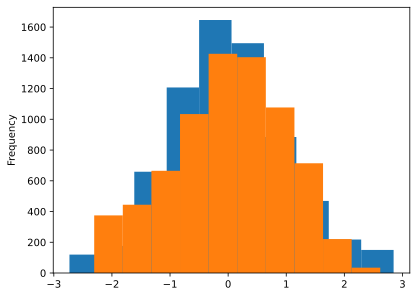

In [26]:
v2 = num_features.commonlinkratio_1
v1 = num_features.avglinksize

v1 = v1[v1 < v1.quantile(0.95)]

v1 = (v1 - v1.mean()) / v1.std()
v2 = (v2 - v2.mean()) / v2.std()

v1.plot.hist()
v2.plot.hist()

In [27]:
cat_features = df.select_dtypes(include = [np.object])
cat_features

<ipython-input-27-a9e8c81905be>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features = df.select_dtypes(include = [np.object])


,url,boilerplate,alchemy_category,news_front_page
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0
1,http://www.popsci.com/technology/article/2012-...,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0
2,http://www.menshealth.com/health/flu-fighting-...,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0
3,http://www.dumblittleman.com/2007/12/10-foolpr...,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0
4,http://bleacherreport.com/articles/1205138-the...,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0
...,...,...,...,...
7390,http://techcrunch.com/2010/09/08/kno-raises-46...,"{""title"":""Kno Raises 46 Million More To Build ...",computer_internet,0
7391,http://www.uncoached.com/category/why-i-miss-c...,"{""title"":""Why I Miss College "",""body"":""Mar 30 ...",culture_politics,0
7392,http://eatthis.menshealth.com/slide/sweet-pota...,"{""title"":""Sweet Potatoes Eat This Not That i'...",recreation,0
7393,http://naturallyella.com/,"{""title"":""Naturally Ella "",""body"":"" "",""url"":""n...",arts_entertainment,1


In [28]:
cat_features.columns
cat_features = cat_features[['alchemy_category', 'news_front_page']]
cat_features

,alchemy_category,news_front_page
0,business,0
1,recreation,0
2,health,0
3,health,0
4,sports,0
...,...,...
7390,computer_internet,0
7391,culture_politics,0
7392,recreation,0
7393,arts_entertainment,1


In [29]:
cat_to_num_features = pd.get_dummies(cat_features)
cat_to_num_features

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7391,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7392,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7393,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
df_features = pd.concat([num_features, cat_to_num_features], axis = 1)
df_features

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,...,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0.090774,0,0.245831,...,0,0,0,0,0,0,0,1,0,0
1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0.098707,0,0.203490,...,0,1,0,0,0,0,0,1,0,0
2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0.072448,0,0.226402,...,0,0,0,0,0,0,0,1,0,0
3,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0.095861,0,0.265656,...,0,0,0,0,0,0,0,1,0,0
4,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0.024908,0,0.228887,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,3.010526,0.474747,0.222222,0.191919,0.191919,0.474273,0.0,0.177043,0,0.256669,...,0,0,0,0,0,0,0,1,0,0
7391,2.208054,0.483333,0.246667,0.036667,0.026667,0.558184,0.0,0.057377,0,0.218014,...,0,0,0,0,0,0,0,1,0,0
7392,2.000000,0.315789,0.171053,0.105263,0.052632,0.692529,0.0,0.124122,0,0.248388,...,0,1,0,0,0,0,0,1,0,0
7393,1.026316,0.210526,0.052632,0.000000,0.000000,21.000000,-1.0,0.097778,0,0.256070,...,0,0,0,0,0,0,0,0,1,0


In [31]:
df_features = (df_features - df_features.mean()) / df_features.std()
df_features

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,...,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,-0.081936,1.025140,-0.055864,-0.468893,-0.354305,-0.317535,0.338451,0.828822,-0.147269,0.229640,...,-0.064878,-0.446421,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
1,0.106284,0.195886,0.508987,1.269469,1.309714,-0.313176,0.338451,1.020244,-0.147269,-0.577072,...,-0.064878,2.239734,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
2,-0.043962,0.461692,0.733430,0.292698,-0.091238,-0.303219,0.338451,0.386654,-0.147269,-0.140539,...,-0.064878,-0.446421,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
3,-0.141386,-0.335890,-0.777414,-0.785550,-0.678274,-0.311059,0.338451,0.951555,-0.147269,0.607347,...,-0.064878,-0.446421,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
4,-0.009902,0.156397,0.055487,0.327100,-0.083332,-0.317121,0.338451,-0.760377,-0.147269,-0.093184,...,-0.064878,-0.446421,-0.09915,-0.201654,4.296281,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,0.028853,0.032082,0.055487,1.040411,1.964195,-0.312190,0.338451,2.910320,-0.147269,0.436119,...,-0.064878,-0.446421,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
7391,-0.064244,0.074349,0.222067,-0.577169,-0.311110,-0.297480,0.338451,0.023025,-0.147269,-0.300339,...,-0.064878,-0.446421,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
7392,-0.088381,-0.750448,-0.293216,0.137540,0.046392,-0.273929,0.338451,1.633442,-0.147269,0.278345,...,-0.064878,2.239734,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
7393,-0.201340,-1.268645,-1.100213,-0.959201,-0.678274,3.286092,-2.923712,0.997814,-0.147269,0.424709,...,-0.064878,-0.446421,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,-1.948129,4.914244,-0.450553


In [32]:
df_features.shape

(7395, 36)

In [33]:
target = df.label
target.shape

(7395,)

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_features, target, train_size = 0.75)

In [35]:
x_train.shape

(5546, 36)

In [36]:
y_test.shape

(1849,)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy= 'most_frequent')
model = LogisticRegression(penalty='none')

In [38]:
baseline.fit(x_train, y_train)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [39]:
model_predictions = model.predict(x_test)
model_predictions.mean()

0.5532720389399676

In [40]:
y_test.mean()

0.5267712276906436

In [41]:
baseline.predict(x_test).mean()

1.0

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       875
           1       0.68      0.72      0.70       974

    accuracy                           0.67      1849
   macro avg       0.67      0.67      0.67      1849
weighted avg       0.67      0.67      0.67      1849

